In [1]:
# import libraries
import torch
import matplotlib.pyplot as plt

In [2]:
# Variable to evaluate over
x = torch.linspace(start=-3, end=3, steps=101)

# Create a function that returns the activated output
def NN_output_x(act_func):
  # Get activation function type
  # This code replaces torch.relu with torch.<actfun>
  act_func = getattr(torch, act_func) # Torch.relu()
  return act_func(x)

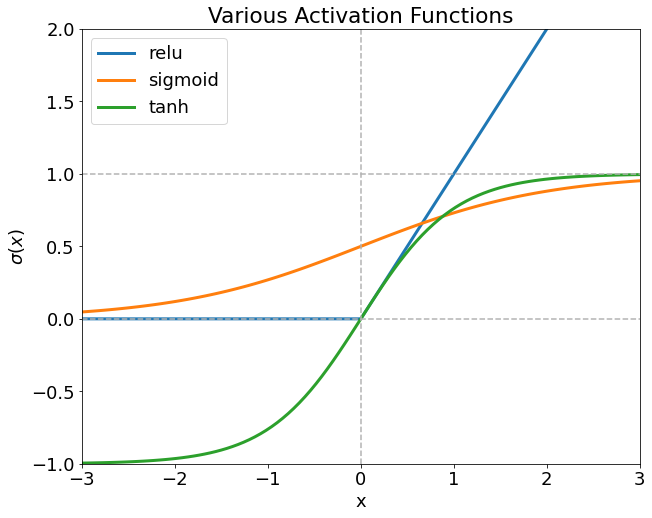

In [5]:
# The activation functions
activation_funcs = ['relu', 'sigmoid', 'tanh']

fig = plt.figure(figsize=(10, 8))

for act_func_i in activation_funcs:
  plt.plot(x, NN_output_x(act_func_i), label=act_func_i, linewidth=3)

# Add reference lines
dash_line_color = [.7, .7, .7]
plt.plot(x[[0, -1]], [0, 0], '--', color=dash_line_color)
plt.plot(x[[0, -1]], [1, 1], '--', color=dash_line_color)
plt.plot([0, 0], [-1, 2], '--', color=dash_line_color)

# Make the plot look nicer
plt.legend()
plt.xlabel('x')
plt.ylabel('$\sigma(x)$')
plt.title('Various Activation Functions')
plt.xlim(x[[0, -1]])
plt.ylim([-1, 2])
plt.show()

# More activation functions in torch.nn

In [6]:
# Create a function that returns the activated output FUNCTION
# This is different from the previous function
def NN_output(act_func):
  # Get activation function type
  # This code replaces torch.nn.relu with torch.nn.<actfun>
  act_func = getattr(torch.nn, act_func)
  return act_func() # The function itself

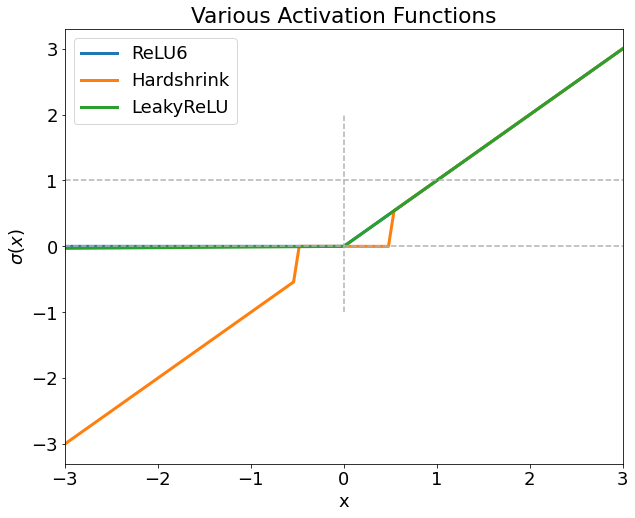

In [12]:
# The activation functions
activation_funcs = ['ReLU6', 'Hardshrink', 'LeakyReLU']

fig = plt.figure(figsize=(10, 8))

for act_func_i in activation_funcs:
  plt.plot(x, NN_output(act_func_i)(x), label=act_func_i, linewidth=3)

# Add reference lines
# Add reference lines
dash_line_color = [.7, .7, .7]
plt.plot(x[[0, -1]], [0, 0], '--', color=dash_line_color)
plt.plot(x[[0, -1]], [1, 1], '--', color=dash_line_color)
plt.plot([0, 0], [-1, 2], '--', color=dash_line_color)

# Make the plot look nicer
plt.legend()
plt.xlabel('x')
plt.ylabel('$\sigma(x)$')
plt.title('Various Activation Functions')
plt.xlim(x[[0, -1]])
# plt.ylim([-1, 3])
# plt.ylim([-.1, .1])
plt.show()

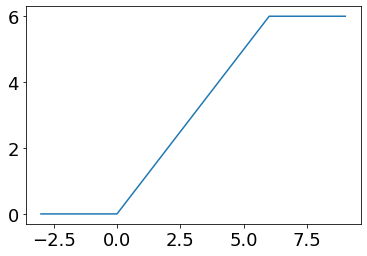

In [13]:
# relu6 in more detail
x = torch.linspace(start=-3, end=9, steps=101)
relu_6 = torch.nn.ReLU6()

plt.plot(x, relu_6(x))
plt.show()

# Differences between torch and torch.nn

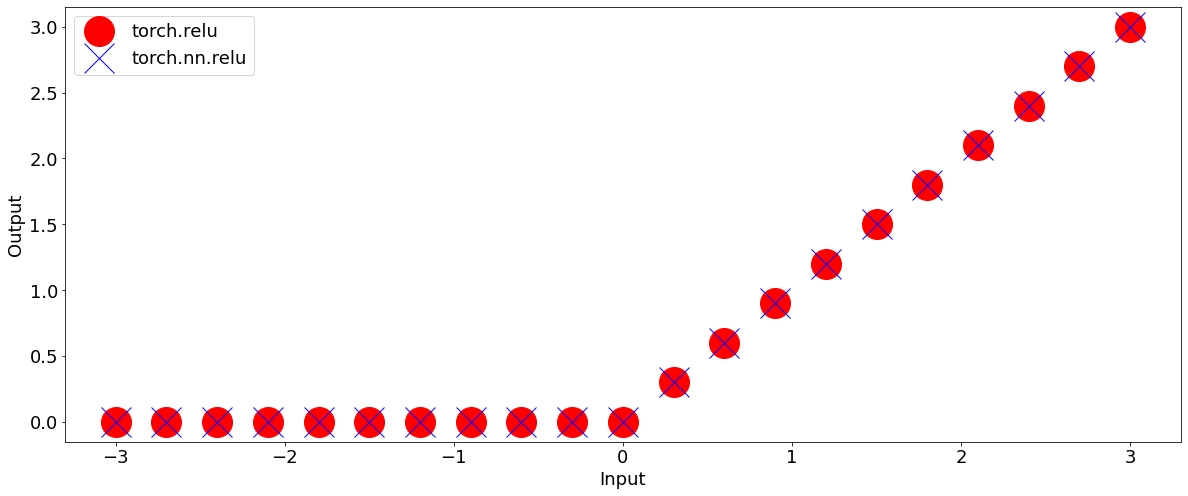

In [19]:
# Redefine x (fewer points to facilitate visualization)
x = torch.linspace(start=-3, end=3, steps=21)

# In torch. Compute directly -> Output number
y1 = torch.relu(x)

# In torch.nn. Output -> function itself
relu = torch.nn.ReLU()
y2 = relu(x)

# The results are the same
plt.figure(figsize=(20, 8))
plt.plot(x, y1, 'ro', label='torch.relu', markersize=30)
plt.plot(x, y2, 'bx', label='torch.nn.relu', markersize=30)
plt.legend()
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

In [ ]:
# List of activation functions in PyTorch:
#  https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

# Additional explorations
1) Look through the code to make sure you understand what it does (linear weighted combination -> nonlinear function).

2) Set x2=x1**2 and run the code. Then set one of the weights to be negative. Then set the negative weight to be close
   to zero (e.g., -.01) with the positive weight relatively large (e.g., .8). Then swap the signs.

3) Set x2=x1**2, and set the weights to be .4 and .6. Now set w2=.6 (you might want to zoom in on the y-axis).

4) Set x2 to be the absolute value of x1 and both weights positive. Then set w2=-.6. Why does w2<0 have such a big impact?
   More generally, under what conditions are the input and output identical? 

5) Have fun! Spend a few minutes playing around with the code. Also try changing the activation function to tanh or 
   anything else. The goal is to see that really simple input functions with really simple weights can produce really
   complicated-looking nonlinear outputs.

In [ ]:
# The goal of these explorations is to help you appreciate the remarkably diverse nonlinear shapes that a node can produce.
# All explorations use the code below.

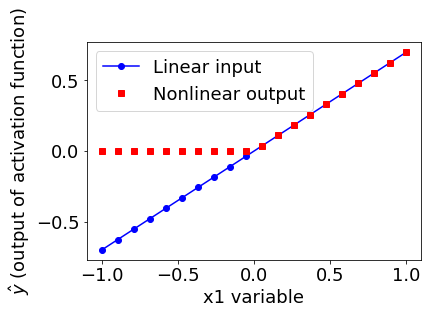

In [23]:
# Create input vectors
x1 = torch.linspace(start=-1, end=1, steps=20)
x2 = 2 * x1

# And corresponding weights
w1 = -0.3
w2 = 0.5

# Their linear combination
lin_part = x1 * w1 + x2 * w2

# And the nonlinear output
y = torch.relu(lin_part)

# And plot!
plt.plot(x1, lin_part, 'bo-', label='Linear input')
plt.plot(x1, y, 'rs', label='Nonlinear output')
plt.ylabel('$\\hat{y}$ (output of activation function)')
plt.xlabel('x1 variable')
# plt.ylim([-.1,.1]) # optional -- uncomment and modify to zoom in
plt.legend()
plt.show()